In [2]:
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import discriminant_analysis
from sklearn import naive_bayes
from sklearn import metrics
from sklearn import neighbors
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

We will now consider the Boston housing data set, from the ISLR2
library.

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Boston.csv')#, index_col=0)#'/home/zacharygibbs/documents/datascience/ISLR/book_content/data/Boston.csv', index_col=0)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


(a) Based on this data set, provide an estimate for the population
mean of medv. Call this estimate ˆµ.

In [10]:
#population mean - reasonably assume that the pouplation mean is the same as that of our sample
df['medv'].mean()

22.532806324110698

(b) Provide an estimate of the standard error of ˆµ. Interpret this
result.
Hint: We can compute the standard error of the sample mean by
dividing the sample standard deviation by the square root of the
number of observations.

In [12]:
df['medv'].std() / len(df['medv'])**0.5

0.4088611474975351

(c) Now estimate the standard error of ˆµ using the bootstrap. How
does this compare to your answer from (b)?

In [58]:
#x = np.random.normal(loc = 0.5, scale=0.5, size=int(np.round(len(df)*0.5)))
#print (np.mean(x))
#x
#np.random.normal
n_bootstraps = 100;
frac_datapoints = 0.333
sample_mean = []
sample_med = []
sample_10pct = []
 
for i in range(n_bootstraps):
    y = random.sample(df['medv'].values.tolist(), int(np.round(len(df) * frac_datapoints)))
    avg = np.mean(y)
    med = np.median(y)
    sample_mean.append(avg)
    sample_med.append(med)
    sample_10pct.append(pd.Series(y).quantile(q=0.1))
    
pop_mean = np.mean(sample_mean)
pop_se = np.std(sample_mean) * np.sqrt(len(df) / (n_bootstraps - 1))
print(pop_mean)
#standard error - essentially std dev of the means * sqrt n / sqrt b-1
print(pop_se)


22.54199404761905
1.2930614909495726


(d) Based on your bootstrap estimate from (c), provide a 95 % confidence interval for the mean of medv. Compare it to the results
obtained using t.test(Boston$medv).
Hint: You can approximate a 95 % confidence interval using the
formula [ˆµ − 2SE(ˆµ), µˆ + 2SE(ˆµ)].

In [40]:
print(pop_mean - 2*pop_se, pop_mean + 2*pop_se)

19.700875356904103 25.73119607166733


(e) Based on this data set, provide an estimate, ˆµmed, for the median
value of medv in the population.

In [53]:
print(np.array(sample_med).mean())
print(np.array(sample_med).std())

21.202
0.48512472623027547


(f) We now would like to estimate the standard error of ˆµmed. Unfortunately, there is no simple formula for computing the standard
error of the median. Instead, estimate the standard error of the
median using the bootstrap. Comment on your findings.

In [ ]:
#see above

(g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts. Call this quantity ˆµ0.1.
(You can use the quantile() function.)

In [59]:
print(np.array(sample_10pct).mean())
print(np.array(sample_10pct).std())

12.7906
0.6323746041706607


(h) Use the bootstrap to estimate the standard error of ˆµ0.1. Comment on your findings.

In [60]:
#see above

7. In Sections 5.3.2 and 5.3.3, we saw that the cv.glm() function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just the glm() and predict.glm() functions, and a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4).

In [86]:
dfWeekly = pd.read_csv('/home/zacharygibbs/documents/datascience/ISLR/book_content/data/Weekly.csv')
dfWeekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


(a) Fit a logistic regression model that predicts Direction using Lag1
and Lag2.

In [87]:
X = dfWeekly[['Lag1', 'Lag2']]
y = dfWeekly['Direction']
sc_whole = preprocessing.StandardScaler()
X_whole = sc_whole.fit_transform(X)
logi_res = linear_model.LogisticRegression(random_state=0)
logi_res.fit(X_whole,y)
y_pred_logi = logi_res.predict(X_whole)
cm_logi = metrics.confusion_matrix(y, y_pred_logi)
print(cm_logi)
print('Accuracy ' + str(metrics.accuracy_score(y, y_pred_logi)))

[[ 37 447]
 [ 38 567]]
Accuracy 0.5546372819100092


(b) Fit a logistic regression model that predicts Direction using Lag1
and Lag2 using all but the first observation. (just going to do all but 1)

In [108]:
#X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=1, random_state=42)
i=0
X_train = X.drop(i, axis=0)
X_test = X.iloc[[i], :]
y_train = y.drop(i, axis=0)
y_test = np.array([y.iloc[i]])
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logi_res = linear_model.LogisticRegression(random_state=0)
logi_res.fit(X_train,y_train)
y_pred_logi = logi_res.predict(X_test)
cm_logi = metrics.confusion_matrix(y_test, y_pred_logi)
print(cm_logi)
print('Accuracy ' + str(metrics.accuracy_score(y_test, y_pred_logi)))
print(logi_res.score(X_test, y_test))

[[0 1]
 [0 0]]
Accuracy 0.0
0.0


(c) Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation
will go up if P(Direction = "Up"|Lag1, Lag2) > 0.5. Was this
observation correctly classified?

In [ ]:
#see above, no it was not

(d) Write a for loop from i = 1 to i = n, where n is the number of observations in the data set, that performs each of the following steps:

i. Fit a logistic regression model using all but the ith observation to predict Direction using Lag1 and Lag2.

In [116]:
#X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=1, random_state=42)
i=0
y_pred_loocv = []
y_pred_loocv_prob = []
y_pred_loocv_correct = []
for i in range(len(y)):
    X_train = X.drop(i, axis=0)
    X_test = X.iloc[[i], :]
    y_train = y.drop(i, axis=0)
    y_test = np.array([y.iloc[i]])
    sc = preprocessing.StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    logi_res = linear_model.LogisticRegression(random_state=0)
    logi_res.fit(X_train,y_train)
    y_pred_logi = logi_res.predict(X_test)
    y_pred_prob_logi = logi_res.predict_proba(X_test)
    cm_logi = metrics.confusion_matrix(y_test, y_pred_logi)
    #print(cm_logi)
    #print('Accuracy ' + str(metrics.accuracy_score(y_test, y_pred_logi)))
    y_pred_loocv.append(y_pred_logi[0])
    y_pred_loocv_prob.append(y_pred_prob_logi[0])
    y_pred_loocv_correct.append(metrics.accuracy_score(y_test, y_pred_logi))

In [114]:
np.mean(y_pred_loocv_correct)

0.5500459136822773

ii. Compute the posterior probability of the market moving up
for the ith observation.

In [117]:
y_pred_loocv_prob

[array([0.42866794, 0.57133206]),
 array([0.42971446, 0.57028554]),
 array([0.42542069, 0.57457931]),
 array([0.51928713, 0.48071287]),
 array([0.40136247, 0.59863753]),
 array([0.4449398, 0.5550602]),
 array([0.41523087, 0.58476913]),
 array([0.47374297, 0.52625703]),
 array([0.43381167, 0.56618833]),
 array([0.455663, 0.544337]),
 array([0.39993509, 0.60006491]),
 array([0.46906661, 0.53093339]),
 array([0.50014324, 0.49985676]),
 array([0.44362395, 0.55637605]),
 array([0.391088, 0.608912]),
 array([0.43409804, 0.56590196]),
 array([0.46738102, 0.53261898]),
 array([0.39882528, 0.60117472]),
 array([0.47365935, 0.52634065]),
 array([0.40905121, 0.59094879]),
 array([0.48352933, 0.51647067]),
 array([0.43562921, 0.56437079]),
 array([0.46600138, 0.53399862]),
 array([0.39277865, 0.60722135]),
 array([0.44501183, 0.55498817]),
 array([0.45354458, 0.54645542]),
 array([0.45314491, 0.54685509]),
 array([0.46139568, 0.53860432]),
 array([0.43437172, 0.56562828]),
 array([0.55731856, 0.44

iii. Use the posterior probability for the ith observation in order
to predict whether or not the market moves up.

In [118]:
y_pred_loocv

['Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Down',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 'Up',
 

iv. Determine whether or not an error was made in predicting
the direction for the ith observation. If an error was made,
then indicate this as a 1, and otherwise indicate it as a 0.

In [119]:
y_pred_loocv_correct

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0

(e) Take the average of the n numbers obtained in (d)iv in order to
obtain the LOOCV estimate for the test error. Comment on the
results.

In [120]:
np.mean(y_pred_loocv_correct)

0.5500459136822773

# f) - Zach added - Now repeat with built in LOOCV function

In [122]:
#https://www.statology.org/leave-one-out-cross-validation-in-python/
cv = model_selection.LeaveOneOut()
logi_res = linear_model.LogisticRegression(random_state=0)
#use LOOCV to evaluate model
scores = model_selection.cross_val_score(logi_res, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
#view mean absolute error
np.mean(np.absolute(scores))

#Same Error!

0.5500459136822773

## Lets use K-fold  cross validation for completeness

In [124]:
?model_selection.KFold

In [125]:
#https://www.statology.org/leave-one-out-cross-validation-in-python/
cv = model_selection.KFold(n_splits = 5)
logi_res = linear_model.LogisticRegression(random_state=0)
#use LOOCV to evaluate model
scores = model_selection.cross_val_score(logi_res, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
#view mean absolute error
np.mean(np.absolute(scores))
#a little different, but still 

0.5509660508180781

In [264]:
#Visulaizing the trianing set result  
def plot_data(X, y):
    from matplotlib.colors import ListedColormap  
    x_set, y_set = X, y
    x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
    plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
    alpha = 0.75, cmap = ListedColormap(('red','green' )))  
    plt.xlim(x1.min(), x1.max())  
    plt.ylim(x2.min(), x2.max())  
    for i, j in enumerate(nm.unique(y_set)):  
        plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
            c = ListedColormap(('red', 'green'))(i), label = j)  
    #plt.title('K-NN Algorithm (Training set)')  
    #plt.xlabel('Age')  
    #plt.ylabel('Estimated Salary')  
    plt.legend()  
    plt.show()  

## Let's go ahead and evaluate multiple models using KFolds

### First try with different predictors; were using Lag1, Lag2 only

### Lag1, Lag2, Lag3

In [127]:
X = dfWeekly[['Lag1', 'Lag2', 'Lag3']]
y = dfWeekly['Direction']
cv = model_selection.KFold(n_splits = 5)
logi_res = linear_model.LogisticRegression(random_state=0)
#use LOOCV to evaluate model
scores = model_selection.cross_val_score(logi_res, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
#view mean absolute error
np.mean(np.absolute(scores))

0.5463788948547753

#### Lag1,Lag2,Lag3,Lag4 makes best (close to) best logistic model - 0.5555

In [130]:
X = dfWeekly[['Lag1', 'Lag2', 'Lag3', 'Lag4']]
y = dfWeekly['Direction']
cv = model_selection.KFold(n_splits = 5)
logi_res = linear_model.LogisticRegression(random_state=0)
#use LOOCV to evaluate model
scores = model_selection.cross_val_score(logi_res, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
#view mean absolute error
np.mean(np.absolute(scores))

0.5555658901619245

In [129]:
X = dfWeekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]
y = dfWeekly['Direction']
cv = model_selection.KFold(n_splits = 5)
logi_res = linear_model.LogisticRegression(random_state=0)
#use LOOCV to evaluate model
scores = model_selection.cross_val_score(logi_res, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
#view mean absolute error
np.mean(np.absolute(scores))

0.5472794148733776

In [134]:
X = dfWeekly[['Lag4']]
y = dfWeekly['Direction']
cv = model_selection.KFold(n_splits = 5)
logi_res = linear_model.LogisticRegression(random_state=0)
#use LOOCV to evaluate model
scores = model_selection.cross_val_score(logi_res, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
#view mean absolute errorA
np.mean(np.absolute(scores))

0.5555447511943516

In [150]:
X = dfWeekly[['Lag1', 'Lag4']]
y = dfWeekly['Direction']
cv = model_selection.KFold(n_splits = 5)
logi_res = linear_model.LogisticRegression(random_state=0)
#use LOOCV to evaluate model
scores = model_selection.cross_val_score(logi_res, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
#view mean absolute errorA
np.mean(np.absolute(scores))

0.5527966854098845

In [149]:
X = dfWeekly[['Lag1', 'Lag4']].copy()
X['Lag1Lag4'] = dfWeekly['Lag2'] * dfWeekly['Lag3']
y = dfWeekly['Direction']
cv = model_selection.KFold(n_splits = 5)
logi_res = linear_model.LogisticRegression(random_state=0)
#use LOOCV to evaluate model
scores = model_selection.cross_val_score(logi_res, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
#view mean absolute error
np.mean(np.absolute(scores))

0.5564664101805268

In [ ]:
#So best model has Lag1, Lag4, and Lag2*Lag3 (but only very slightly better than just Lag 4; Lag1234)

In [151]:
#So lets use Lag1, Lag2, Lag3, Lag4, then do some cross validations w/ different techniques

## LDA

In [152]:
X = dfWeekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]
y = dfWeekly['Direction']
cv = model_selection.KFold(n_splits = 5)
model = discriminant_analysis.LinearDiscriminantAnalysis()
#use LOOCV to evaluate model
scores = model_selection.cross_val_score(model, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
#view mean absolute error
np.mean(np.absolute(scores))

0.5481968460660381

#### Lag2, Lag4 best LDA model 0.5647

In [163]:
X = dfWeekly[['Lag2', 'Lag4']]
y = dfWeekly['Direction']
cv = model_selection.KFold(n_splits = 5)
model = discriminant_analysis.LinearDiscriminantAnalysis()
#use LOOCV to evaluate model
scores = model_selection.cross_val_score(model, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
#view mean absolute error
np.mean(np.absolute(scores))

0.5647317465015009

In [167]:
X = dfWeekly[['Lag2', 'Lag3', 'Lag4']]
y = dfWeekly['Direction']
cv = model_selection.KFold(n_splits = 5)
model = discriminant_analysis.LinearDiscriminantAnalysis()
#use LOOCV to evaluate model
scores = model_selection.cross_val_score(model, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
#view mean absolute error
np.mean(np.absolute(scores))

0.5610535661438296

In [173]:
X = dfWeekly[['Lag2','Lag4', 'Lag5']]
y = dfWeekly['Direction']
cv = model_selection.KFold(n_splits = 5)
model = discriminant_analysis.LinearDiscriminantAnalysis()
#use LOOCV to evaluate model
scores = model_selection.cross_val_score(model, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
#view mean absolute error
np.mean(np.absolute(scores))

0.5619540861624318

## QDA

In [194]:
X = dfWeekly[['Lag2', 'Lag3']]
y = dfWeekly['Direction']
cv = model_selection.KFold(n_splits = 5)
model = discriminant_analysis.QuadraticDiscriminantAnalysis()
#use LOOCV to evaluate model
scores = model_selection.cross_val_score(model, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
#view mean absolute error
np.mean(np.absolute(scores))

0.5546315477952056

In [ ]:
#does not do as well as LDA

## Naive Bayes (Gaussian)

In [202]:
X = dfWeekly[['Lag4']]
y = dfWeekly['Direction']
cv = model_selection.KFold(n_splits = 5)
model = naive_bayes.GaussianNB()
#use LOOCV to evaluate model
scores = model_selection.cross_val_score(model, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
#view mean absolute error
np.mean(np.absolute(scores))

0.5564579545934976

In [222]:
X = dfWeekly[['Lag4', 'Lag2', 'Lag3']]
y = dfWeekly['Direction']
cv = model_selection.KFold(n_splits = 5)
model = naive_bayes.GaussianNB()
scores = model_selection.cross_val_score(model, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
#view mean absolute error
np.mean(np.absolute(scores))

0.5527924576163701

In [ ]:
#NB does not outperform LDA

### KNN

Text(0, 0.5, 'Accuracy')

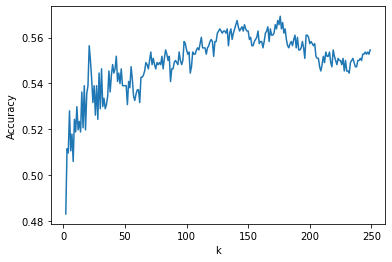

In [274]:
ks = list(range(2,250))
knn_res = []
for i in ks:
    X = dfWeekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]
    y = dfWeekly['Direction']
    cv = model_selection.KFold(n_splits = 5)
    model = neighbors.KNeighborsClassifier(n_neighbors=i)
    scores = model_selection.cross_val_score(model, X, y, scoring='accuracy',
                             cv=cv, n_jobs=-1)
    #view mean absolute error
    knn_res.append(np.mean(np.absolute(scores)))
    
plt.plot(ks, knn_res)
plt.xlabel('k')
plt.ylabel('Accuracy')

In [262]:
X = dfWeekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]
y = dfWeekly['Direction']
cv = model_selection.KFold(n_splits = 5)
model = neighbors.KNeighborsClassifier(n_neighbors=141)
scores = model_selection.cross_val_score(model, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)
#view mean absolute error
np.mean(np.absolute(scores))

0.5674713566989389

In [271]:
len(y)

1089

In [ ]:
#Somehow KNN w/ 141 neighbors is the best... lol. i had read that this might be because it doesnt actually use any positional data
#at all and 